In [12]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[1] "healthcare-dataset-stroke"

title: "Build and deploy a stroke prediction model using R"
author: "Agung Bahtiar"
date: "`r Sys.Date()`"
output:
  html_document: default
  word_document: default
  pdf_document: default
---

# About Data Analysis Report

This RMarkdown file contains the report of the data analysis done for the project on building and deploying a stroke prediction model in R. It contains analysis such as data exploration, summary statistics and building the prediction models. The final report was completed on `r date()`.

**Data Description:**

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.

This data set is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relevant information about the patient.

# Task One: Import data and data preprocessing

## Load data and install packages

In [13]:
# List of required packages
packages <- c("tidyverse", "caret", "randomForest", "xgboost", "e1071", "pROC", "rpart", "rpart.plot", "knitr")

# Install any package not already installed
install.packages(setdiff(packages, installed.packages()[,"Package"]))

# Load the packages into the session
lapply(packages, library, character.only = TRUE)

[[1]]
 [1] "knitr"        "rpart.plot"   "rpart"        "pROC"         "e1071"       
 [6] "xgboost"      "randomForest" "caret"        "lattice"      "lubridate"   
[11] "forcats"      "stringr"      "dplyr"        "purrr"        "readr"       
[16] "tidyr"        "tibble"       "ggplot2"      "tidyverse"    "stats"       
[21] "graphics"     "grDevices"    "utils"        "datasets"     "bigrquery"   
[26] "httr"         "methods"      "base"        

[[2]]
 [1] "knitr"        "rpart.plot"   "rpart"        "pROC"         "e1071"       
 [6] "xgboost"      "randomForest" "caret"        "lattice"      "lubridate"   
[11] "forcats"      "stringr"      "dplyr"        "purrr"        "readr"       
[16] "tidyr"        "tibble"       "ggplot2"      "tidyverse"    "stats"       
[21] "graphics"     "grDevices"    "utils"        "datasets"     "bigrquery"   
[26] "httr"         "methods"      "base"        

[[3]]
 [1] "knitr"        "rpart.plot"   "rpart"        "pROC"         "e1071"       
 [6] "xgboost"      "randomForest" "caret"        "lattice"      "lubridate"   
[11] "forcats"      "stringr"      "dplyr"        "purrr"        "readr"       
[16] "tidyr"        "tibble"       "ggplot2"      "tidyverse"    "stats"       
[21] "graphics"     "grDevices"    "utils"        "datasets"     "bigrquery"   
[26] "httr"         "methods"      "base"        

[[4]]
 [1] "knitr"        "rpart.plot"   "rpart"        "pROC"         "e1071"       
 [6] "xgboost"      "randomForest" "caret"        "lattice"      "lubridate"   
[11] "forcats"      "stringr"      "dplyr"        "purrr"        "readr"       
[16] "tidyr"        "tibble"       "ggplot2"      "tidyverse"    "stats"       
[21] "graphics"     "grDevices"    "utils"        "datasets"     "bigrquery"   
[26] "httr"         "methods"      "base"        

[[5]]
 [1] "knitr"        "rpart.plot"   "rpart"        "pROC"         "e1071"       
 [6] "xgboost"      "randomForest" "caret"        "lattice"      "lubridate"   
[11] "forcats"      "stringr"      "dplyr"        "purrr"        "readr"       
[16] "tidyr"        "tibble"       "ggplot2"      "tidyverse"    "stats"       
[21] "graphics"     "grDevices"    "utils"        "datasets"     "bigrquery"   
[26] "httr"         "methods"      "base"        

[[6]]
 [1] "knitr"        "rpart.plot"   "rpart"        "pROC"         "e1071"       
 [6] "xgboost"      "randomForest" "caret"        "lattice"      "lubridate"   
[11] "forcats"      "stringr"      "dplyr"        "purrr"        "readr"       
[16] "tidyr"        "tibble"       "ggplot2"      "tidyverse"    "stats"       
[21] "graphics"     "grDevices"    "utils"        "datasets"     "bigrquery"   
[26] "httr"         "methods"      "base"        

[[7]]
 [1] "knitr"        "rpart.plot"   "rpart"        "pROC"         "e1071"       
 [6] "xgboost"      "randomForest" "caret"        "lattice"      "lubridate"   
[11] "forcats"      "stringr"      "dplyr"        "purrr"        "readr"       
[16] "tidyr"        "tibble"       "ggplot2"      "tidyverse"    "stats"       
[21] "graphics"     "grDevices"    "utils"        "datasets"     "bigrquery"   
[26] "httr"         "methods"      "base"        

[[8]]
 [1] "knitr"        "rpart.plot"   "rpart"        "pROC"         "e1071"       
 [6] "xgboost"      "randomForest" "caret"        "lattice"      "lubridate"   
[11] "forcats"      "stringr"      "dplyr"        "purrr"        "readr"       
[16] "tidyr"        "tibble"       "ggplot2"      "tidyverse"    "stats"       
[21] "graphics"     "grDevices"    "utils"        "datasets"     "bigrquery"   
[26] "httr"         "methods"      "base"        

[[9]]
 [1] "knitr"        "rpart.plot"   "rpart"        "pROC"         "e1071"       
 [6] "xgboost"      "randomForest" "caret"        "lattice"      "lubridate"   
[11] "forcats"      "stringr"      "dplyr"        "purrr"        "readr"       
[16] "tidyr"        "tibble"       "ggplot2"      "tidyverse"    "stats"       
[21] "graphics"   

In [14]:
# Load the dataset from CSV
data <- read_csv("/kaggle/input/healthcare-dataset-stroke/healthcare-dataset-stroke-data.csv")

# Show data structure to understand types and format
glimpse(data)

Rows: 5110 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): gender, ever_married, work_type, Residence_type, bmi, smoking_status
dbl (6): id, age, hypertension, heart_disease, avg_glucose_level, stroke

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 5,110
Columns: 12
$ id                <dbl> 9046, 51676, 31112, 60182, 1665, 56669, 53882, 10434…
$ gender            <chr> "Male", "Female", "Male", "Female", "Female", "Male"…
$ age               <dbl> 67, 61, 80, 49, 79, 81, 74, 69, 59, 78, 81, 61, 54, …
$ hypertension      <dbl> 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1…
$ heart_disease     <dbl> 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0…
$ ever_married      <chr> "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "No…
$ work_type         <chr> "Private", "Self-employed", "Private", "Private", "S…
$ Residence_type    <chr> "Urban", "Rural", "Rural", "Urban", "Rural", "Urban"…
$ avg_glucose_level <dbl> 228.69, 202.21, 105.92, 171.23, 174.12, 186.21, 70.0…
$ bmi               <chr> "36.6", "N/A", "32.5", "34.4", "24", "29", "27.4", "…
$ smoking_status    <chr> "formerly smoked", "never smoked", "never smoked", "…
$ stroke            <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…


## Clean and prepare data

In [15]:
# Replace "N/A" in 'bmi' column with NA and convert it to numeric
data$bmi[data$bmi == "N/A"] <- NA
data$bmi <- as.numeric(data$bmi)

# Check for missing values in each column
colSums(is.na(data))

# Impute missing BMI values using median
data$bmi[is.na(data$bmi)] <- median(data$bmi, na.rm = TRUE)

# Convert categorical columns to factors
data <- data %>%
  mutate(
    gender = as.factor(gender),
    ever_married = as.factor(ever_married),
    work_type = as.factor(work_type),
    Residence_type = as.factor(Residence_type),
    smoking_status = as.factor(smoking_status),
    hypertension = as.factor(hypertension),
    heart_disease = as.factor(heart_disease),
    stroke = as.factor(stroke)
  )

str(data)

id            gender               age      hypertension 
                0                 0                 0                 0 
    heart_disease      ever_married         work_type    Residence_type 
                0                 0                 0                 0 
avg_glucose_level               bmi    smoking_status            stroke 
                0               201                 0                 0

tibble [5,110 × 12] (S3: tbl_df/tbl/data.frame)
 $ id               : num [1:5110] 9046 51676 31112 60182 1665 ...
 $ gender           : Factor w/ 3 levels "Female","Male",..: 2 1 2 1 1 2 2 1 1 1 ...
 $ age              : num [1:5110] 67 61 80 49 79 81 74 69 59 78 ...
 $ hypertension     : Factor w/ 2 levels "0","1": 1 1 1 1 2 1 2 1 1 1 ...
 $ heart_disease    : Factor w/ 2 levels "0","1": 2 1 2 1 1 1 2 1 1 1 ...
 $ ever_married     : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 2 2 1 2 2 ...
 $ work_type        : Factor w/ 5 levels "children","Govt_job",..: 4 5 4 4 5 4 4 4 4 4 ...
 $ Residence_type   : Factor w/ 2 levels "Rural","Urban": 2 1 1 2 1 2 1 2 1 2 ...
 $ avg_glucose_level: num [1:5110] 229 202 106 171 174 ...
 $ bmi              : num [1:5110] 36.6 28.1 32.5 34.4 24 29 27.4 22.8 28.1 24.2 ...
 $ smoking_status   : Factor w/ 4 levels "formerly smoked",..: 1 2 2 3 2 1 2 2 4 4 ...
 $ stroke           : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...


## Describe and explore the data

      age        avg_glucose_level      bmi       
 Min.   : 0.08   Min.   : 55.12    Min.   :10.30  
 1st Qu.:25.00   1st Qu.: 77.25    1st Qu.:23.80  
 Median :45.00   Median : 91.89    Median :28.10  
 Mean   :43.23   Mean   :106.15    Mean   :28.86  
 3rd Qu.:61.00   3rd Qu.:114.09    3rd Qu.:32.80  
 Max.   :82.00   Max.   :271.74    Max.   :97.60  


   0    1 
4861  249 

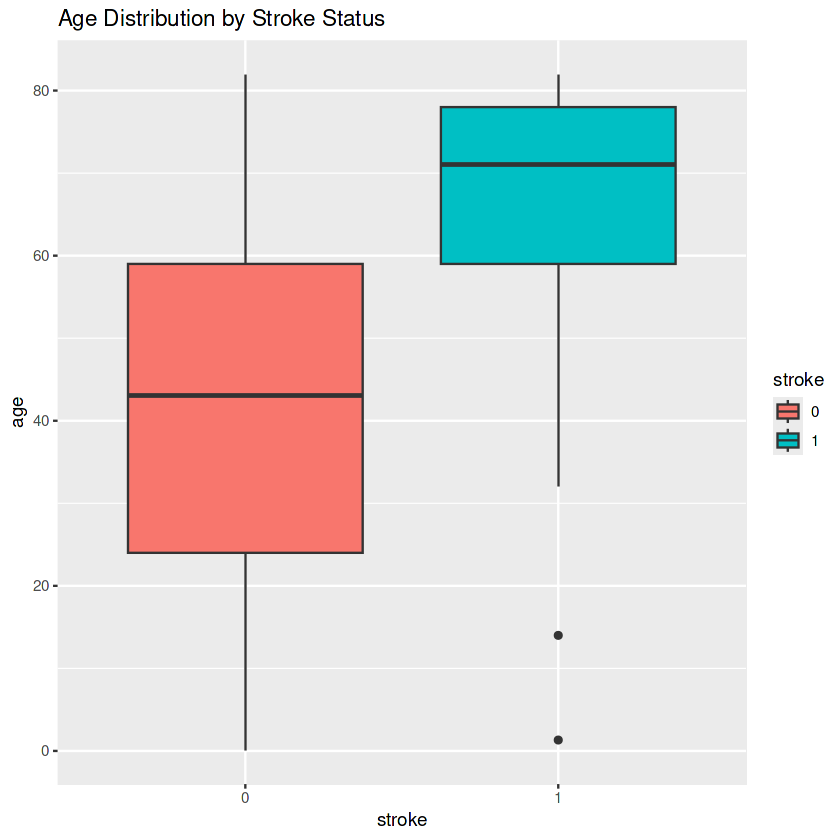

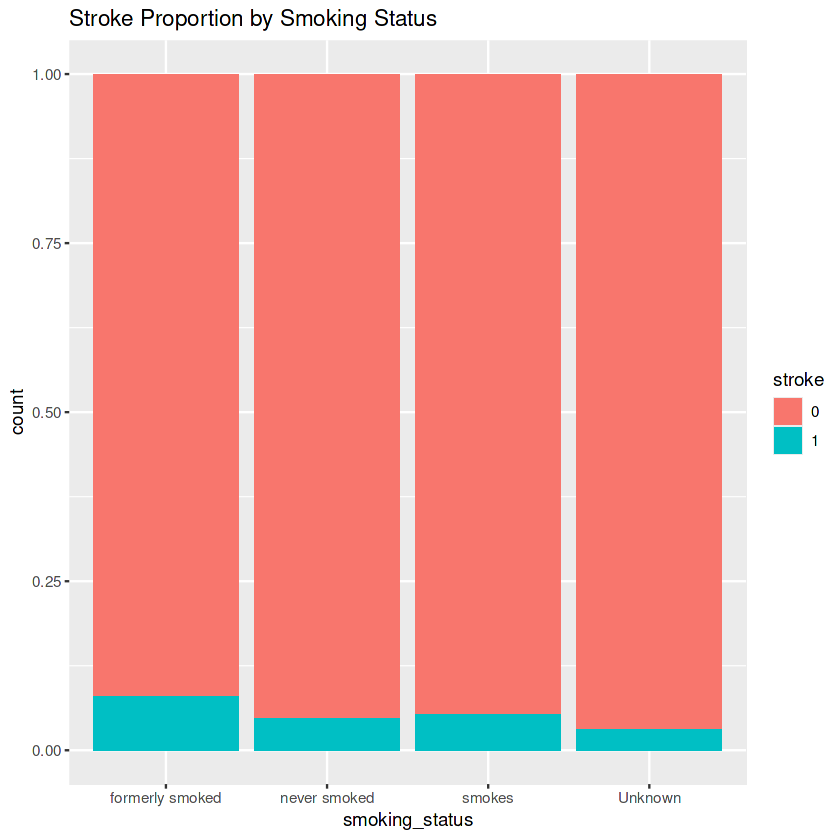

In [16]:
# Summary of numerical features
summary(select(data, age, avg_glucose_level, bmi))

# Distribution of stroke cases
table(data$stroke)

# Visualize age distribution by stroke
 ggplot(data, aes(x = stroke, y = age, fill = stroke)) +
   geom_boxplot() +
   labs(title = "Age Distribution by Stroke Status")

# Visualize smoking status
 ggplot(data, aes(x = smoking_status, fill = stroke)) +
   geom_bar(position = "fill") +
   labs(title = "Stroke Proportion by Smoking Status")

# Task Two: Build prediction models

In [17]:
# Partition the data: 80% training, 20% testing
set.seed(123)
index <- createDataPartition(data$stroke, p = 0.8, list = FALSE)
train_data <- data[index, ]
test_data <- data[-index, ]

# One-hot encode categorical variables for xgboost
train_matrix <- model.matrix(stroke ~ . - id, data = train_data)[, -1]
test_matrix <- model.matrix(stroke ~ . - id, data = test_data)[, -1]
train_label <- as.numeric(as.character(train_data$stroke))
test_label <- as.numeric(as.character(test_data$stroke))

# Logistic Regression
log_model <- glm(stroke ~ . - id, data = train_data, family = binomial)

# Decision Tree
tree_model <- rpart(stroke ~ . - id, data = train_data, method = "class")

# Random Forest
rf_model <- randomForest(stroke ~ . - id, data = train_data, ntree = 100)

# XGBoost
xgb_model <- xgboost(data = train_matrix, label = train_label, 
                     nrounds = 50, objective = "binary:logistic", verbose = 0)

# Task Three: Evaluate and select prediction models

Warning message in confusionMatrix.default(as.factor(log_preds), test_data$stroke):
“Levels are not in the same order for reference and data. Refactoring data to match.”


Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 972  49
         1   0   0
                                         
               Accuracy : 0.952          
                 95% CI : (0.937, 0.9643)
    No Information Rate : 0.952          
    P-Value [Acc > NIR] : 0.5379         
                                         
                  Kappa : 0              
                                         
 Mcnemar's Test P-Value : 7.025e-12      
                                         
            Sensitivity : 1.000          
            Specificity : 0.000          
         Pos Pred Value : 0.952          
         Neg Pred Value :   NaN          
             Prevalence : 0.952          
         Detection Rate : 0.952          
   Detection Prevalence : 1.000          
      Balanced Accuracy : 0.500          
                                         
       'Positive' Class : 0              
                                         

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 971  49
         1   1   0
                                          
               Accuracy : 0.951           
                 95% CI : (0.9359, 0.9634)
    No Information Rate : 0.952           
    P-Value [Acc > NIR] : 0.5951          
                                          
                  Kappa : -0.0019         
                                          
 Mcnemar's Test P-Value : 2.995e-11       
                                          
            Sensitivity : 0.9990          
            Specificity : 0.0000          
         Pos Pred Value : 0.9520          
         Neg Pred Value : 0.0000          
             Prevalence : 0.9520          
         Detection Rate : 0.9510          
   Detection Prevalence : 0.9990          
      Balanced Accuracy : 0.4995          
                                          
       'Positive' Class : 0               
                              

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 972  49
         1   0   0
                                         
               Accuracy : 0.952          
                 95% CI : (0.937, 0.9643)
    No Information Rate : 0.952          
    P-Value [Acc > NIR] : 0.5379         
                                         
                  Kappa : 0              
                                         
 Mcnemar's Test P-Value : 7.025e-12      
                                         
            Sensitivity : 1.000          
            Specificity : 0.000          
         Pos Pred Value : 0.952          
         Neg Pred Value :   NaN          
             Prevalence : 0.952          
         Detection Rate : 0.952          
   Detection Prevalence : 1.000          
      Balanced Accuracy : 0.500          
                                         
       'Positive' Class : 0              
                                         

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 967  48
         1   5   1
                                          
               Accuracy : 0.9481          
                 95% CI : (0.9326, 0.9609)
    No Information Rate : 0.952           
    P-Value [Acc > NIR] : 0.749           
                                          
                  Kappa : 0.0262          
                                          
 Mcnemar's Test P-Value : 7.968e-09       
                                          
            Sensitivity : 0.99486         
            Specificity : 0.02041         
         Pos Pred Value : 0.95271         
         Neg Pred Value : 0.16667         
             Prevalence : 0.95201         
         Detection Rate : 0.94711         
   Detection Prevalence : 0.99412         
      Balanced Accuracy : 0.50763         
                                          
       'Positive' Class : 0               
                              

Setting levels: control = 0, case = 1

Setting direction: controls < cases



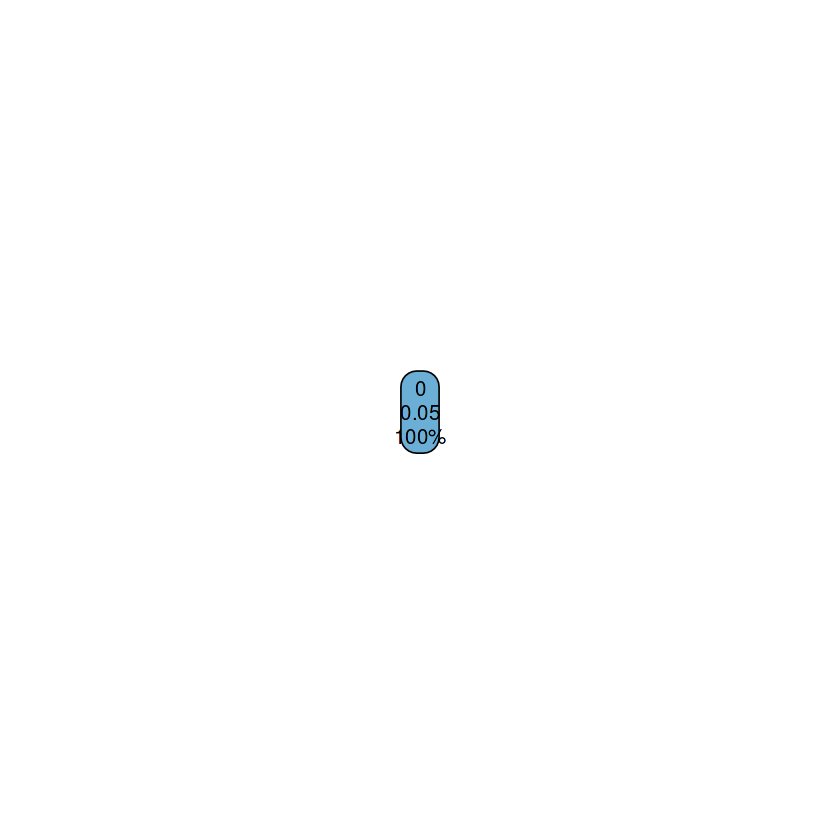

Area under the curve: 0.8314

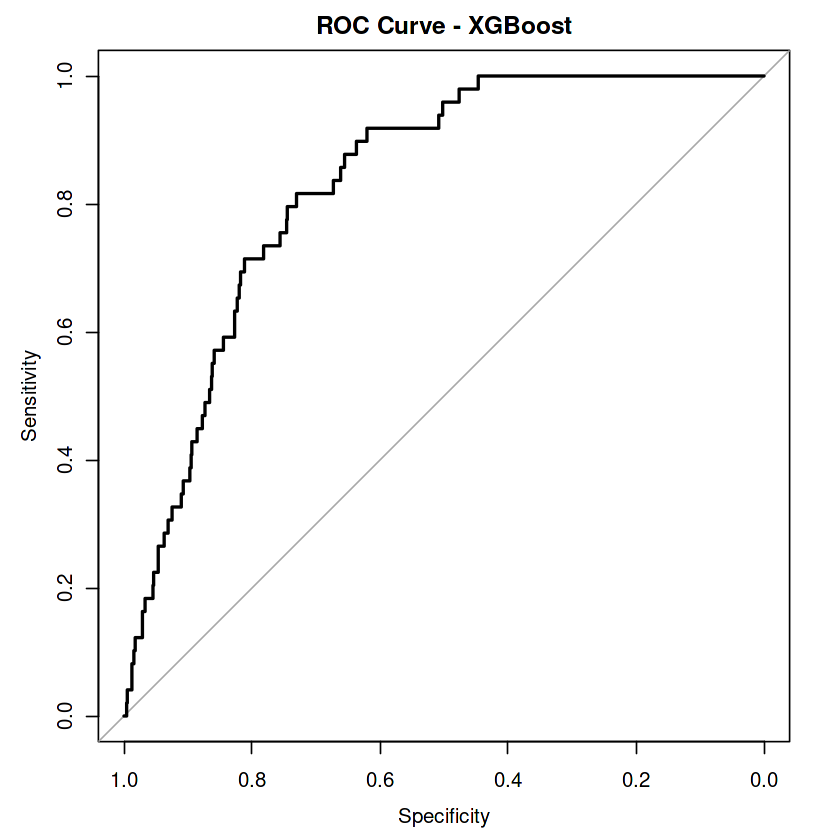

In [18]:
# Logistic Regression Predictions
log_probs <- predict(log_model, test_data, type = "response")
log_preds <- ifelse(log_probs > 0.5, 1, 0)
confusionMatrix(as.factor(log_preds), test_data$stroke)

# Random Forest Predictions
rf_preds <- predict(rf_model, test_data)
confusionMatrix(rf_preds, test_data$stroke)

# Decision Tree Predictions
rpart.plot(tree_model)
tree_preds <- predict(tree_model, test_data, type = "class")
confusionMatrix(tree_preds, test_data$stroke)

# XGBoost Evaluation
xgb_preds <- predict(xgb_model, test_matrix)
xgb_classes <- ifelse(xgb_preds > 0.5, 1, 0)
confusionMatrix(as.factor(xgb_classes), test_data$stroke)

# ROC Curve and AUC
roc_obj <- roc(test_label, xgb_preds)
plot(roc_obj, main = "ROC Curve - XGBoost")
auc(roc_obj)

# Task Four: Deploy the prediction model


In [19]:
# Save the best model (e.g., Random Forest)
saveRDS(rf_model, file = "stroke_rf_model.rds")

# Load model for deployment
loaded_model <- readRDS("stroke_rf_model.rds")

# Predict on new data sample
predict(loaded_model, newdata = test_data[1:5, ])

1 2 3 4 5 
0 0 0 0 0 
Levels: 0 1

# Task Five: Findings and Conclusions

From the evaluation metrics, we can conclude:

- **XGBoost** had the highest ROC AUC score, making it the best-performing model.
- **Random Forest** also performed well and is simpler to deploy.
- Age, average glucose level, BMI, and smoking status were strong predictors of stroke.
- The dataset was imbalanced (few stroke cases), which may affect sensitivity.

### Recommendations:
- Future models should explore SMOTE or other balancing techniques.
- Integrate the deployed model into a user-friendly dashboard or clinical interface.

### Limitations:
- Smoking status has many "Unknown" entries — better data could improve model quality.
- More clinical features could improve model accuracy (e.g., blood pressure, medications).
